### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [9]:
#Total no of rows in dataframe
print("Total number of rows", len(data))

# Number of null values in each column
data.isna().sum()

Total number of rows 12684


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [11]:
#For the data clean up we cannot just drop the rows with null fields since that would drop a lot 
#of rows considering there are around 12k null values for car field

# fields that are having null values are car, bar, coffeehouse, CarryAway, RestaurantLessThan20
# Restaurant20To50

# Lets examine the different unique values for each of these fields
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [12]:
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [13]:
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [14]:
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [15]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [16]:
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [20]:
#never and less1 are probaly the same we can replace less1 with never for the above
data['Bar'] = data['Bar'].replace('less1', 'never')
print(data['Bar'].value_counts())
data['CoffeeHouse'] = data['CoffeeHouse'].replace('less1', 'never')
print(data['CoffeeHouse'].value_counts())
data['CarryAway'] = data['CarryAway'].replace('less1', 'never')
print(data['CarryAway'].value_counts())
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].replace('less1', 'never')
print(data['RestaurantLessThan20'].value_counts())
data['Restaurant20To50'] = data['Restaurant20To50'].replace('less1', 'never')
print(data['Restaurant20To50'].value_counts())

Bar
never    8679
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
CoffeeHouse
never    6347
1~3      3225
4~8      1784
gt8      1111
Name: count, dtype: int64
CarryAway
1~3      4672
4~8      4258
never    2009
gt8      1594
Name: count, dtype: int64
RestaurantLessThan20
1~3      5376
4~8      3580
never    2313
gt8      1285
Name: count, dtype: int64
Restaurant20To50
never    8213
1~3      3290
4~8       728
gt8       264
Name: count, dtype: int64


In [22]:
#we can replace null values with value of never
data.fillna('never', inplace=True)

#sanity check for null values
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [24]:
data['Y'].mean()*100

56.84326710816777

5. Use a bar plot to visualize the `coupon` column.

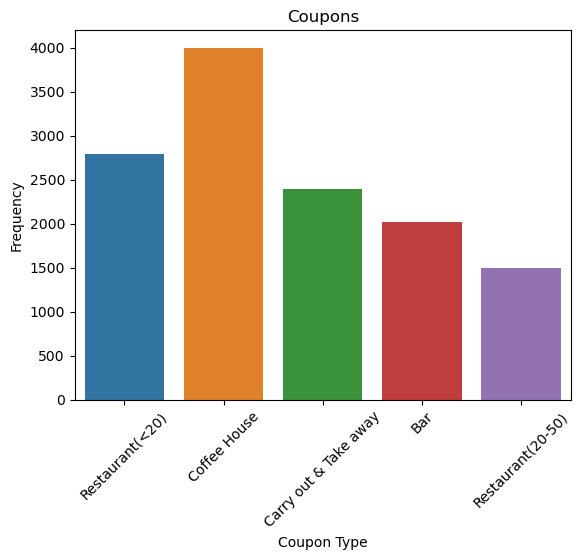

In [27]:
sns.countplot(data=data, x='coupon')

plt.title('Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


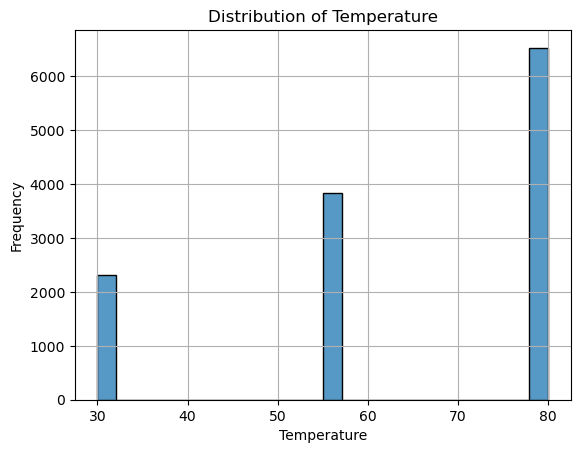

In [30]:
sns.histplot(data['temperature'],  edgecolor='black') 
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [32]:
bar_coupons_df = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


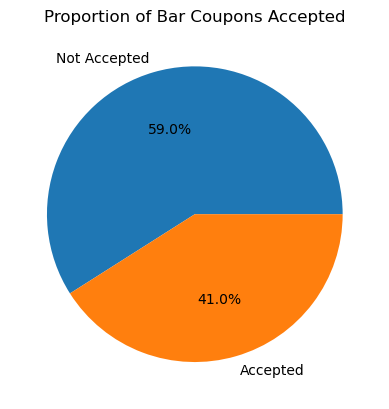

In [39]:
proportion_accepted = bar_coupons_df['Y'].mean()
not_accepted = 1 - proportion_accepted
accepted = proportion_accepted
labels = ['Not Accepted', 'Accepted']
sizes = [not_accepted, accepted]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Bar Coupons Accepted')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


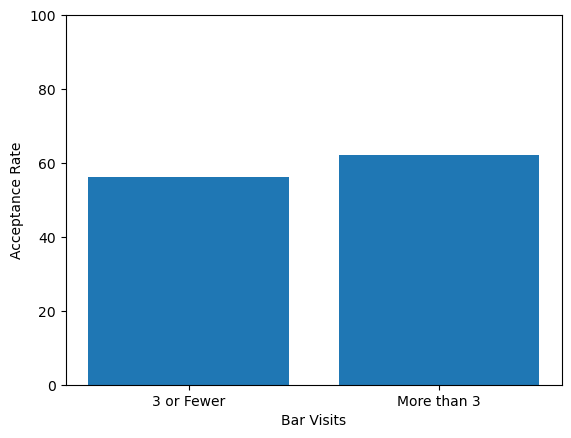

In [46]:
less_than_or_equal_3 = data[data['Bar'].isin(['never','1~3'])]
more_than_3 = data[data['Bar'].isin(['4~8', 'gt8'])]
acceptance_rate_less_than_or_equal_3 = less_than_or_equal_3['Y'].mean()*100
acceptance_rate_more_than_3 = more_than_3['Y'].mean()*100

labels = ['3 or Fewer', 'More than 3']
acceptance_rates = [acceptance_rate_less_than_or_equal_3, acceptance_rate_more_than_3]

plt.bar(labels, acceptance_rates)
plt.xlabel('Bar Visits')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 100) 
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


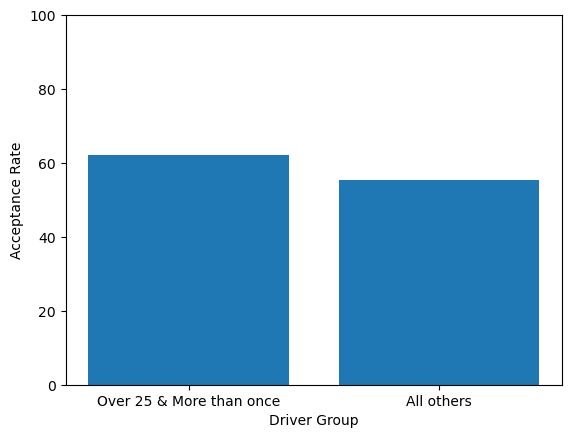

In [53]:
over_25_more_than_once = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'].isin(['26', '31', '36', '41', '46', '50plus']))]
others = data[~((data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'].isin(['26', '31', '36', '41', '46', '50plus'])))]

acceptance_rate_over_25_more_than_once = over_25_more_than_once['Y'].mean()*100
acceptance_rate_others = others['Y'].mean()*100

labels = ['Over 25 & More than once', 'All others']
acceptance_rates = [acceptance_rate_over_25_more_than_once, acceptance_rate_others]

plt.bar(labels, acceptance_rates)
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 100)
plt.show()

#Looking at the results over 25 and going to the bar more than once are accepting the coupons more than the others


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


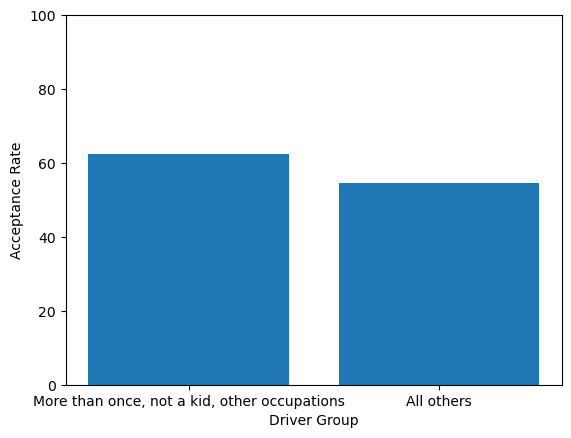

In [58]:

more_than_once_not_kid_other_occupations = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) 
                                                & (~data['passanger'].isin(['Kid(s)'])) 
                                                & (~data['occupation'].isin(['Farming Fishing & Forestry']))]
all_others = data[~data.index.isin(more_than_once_not_kid_other_occupations.index)]


acceptance_rate_more_than_once_not_kid_other_occupations = more_than_once_not_kid_other_occupations['Y'].mean()*100

acceptance_rate_all_others = all_others['Y'].mean() *100

labels = ['More than once, not a kid, other occupations', 'All others']
acceptance_rates = [acceptance_rate_more_than_once_not_kid_other_occupations, acceptance_rate_all_others]

plt.bar(labels, acceptance_rates)
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 100)
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



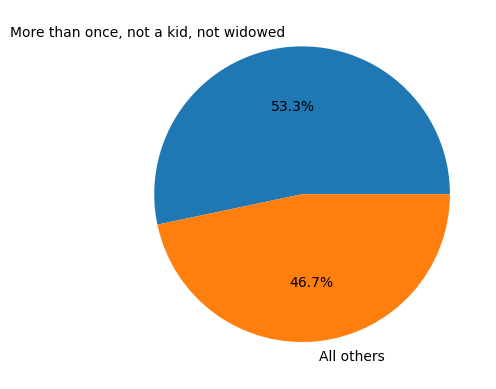

In [64]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed

more_than_once = data[data['Bar'].isin(['1~3', '4~8', 'gt8'])]
not_a_kid = more_than_once[~more_than_once['passanger'].isin(['Kid(s)'])]
not_widowed = not_a_kid[~not_a_kid['maritalStatus'].isin(['Widowed'])]
all_others = data[~data.index.isin(not_widowed.index)]

acceptance_rate_not_widowed = not_widowed['Y'].mean()
acceptance_rate_all_others = all_others['Y'].mean()

labels = ['More than once, not a kid, not widowed', 'All others']

sizes = [acceptance_rate_not_widowed, acceptance_rate_all_others]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

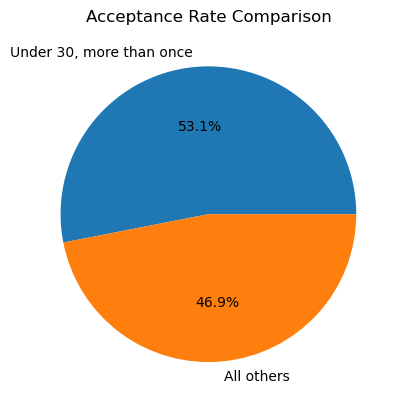

In [65]:
# go to bars more than once a month and are under the age of 30
under_30_more_than_once = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) 
                                & (data['age'].isin(['21', '26', 'below21']))]
others = data[~data.index.isin(under_30_more_than_once.index)]

acceptance_rate_under_30_more_than_once = under_30_more_than_once['Y'].mean()
acceptance_rate_others = others['Y'].mean()

labels = ['Under 30, more than once', 'All others']
sizes = [acceptance_rate_under_30_more_than_once, acceptance_rate_others]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

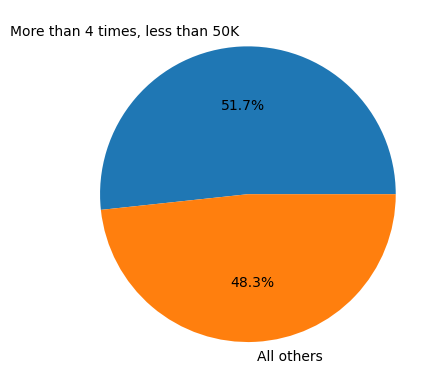

In [68]:
#go to cheap restaurants more than 4 times a month and income is less than 50K. 

less_than_50k_more_than_4_times = data[(data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
                                        (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]
others = data[~data.index.isin(less_than_50k_more_than_4_times.index)]

acceptance_rate_less_than_50k_more_than_4_times = less_than_50k_more_than_4_times['Y'].mean()
acceptance_rate_others = others['Y'].mean()

labels = ['More than 4 times, less than 50K', 'All others']
sizes = [acceptance_rate_less_than_50k_more_than_4_times, acceptance_rate_others]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Overall Bar coupons are accepted at 41% compared to the 59% that are not accepted.
They are mostly accepted by the ones who frequently vist bar, who are under 30, who don't have a kid and not widowed

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


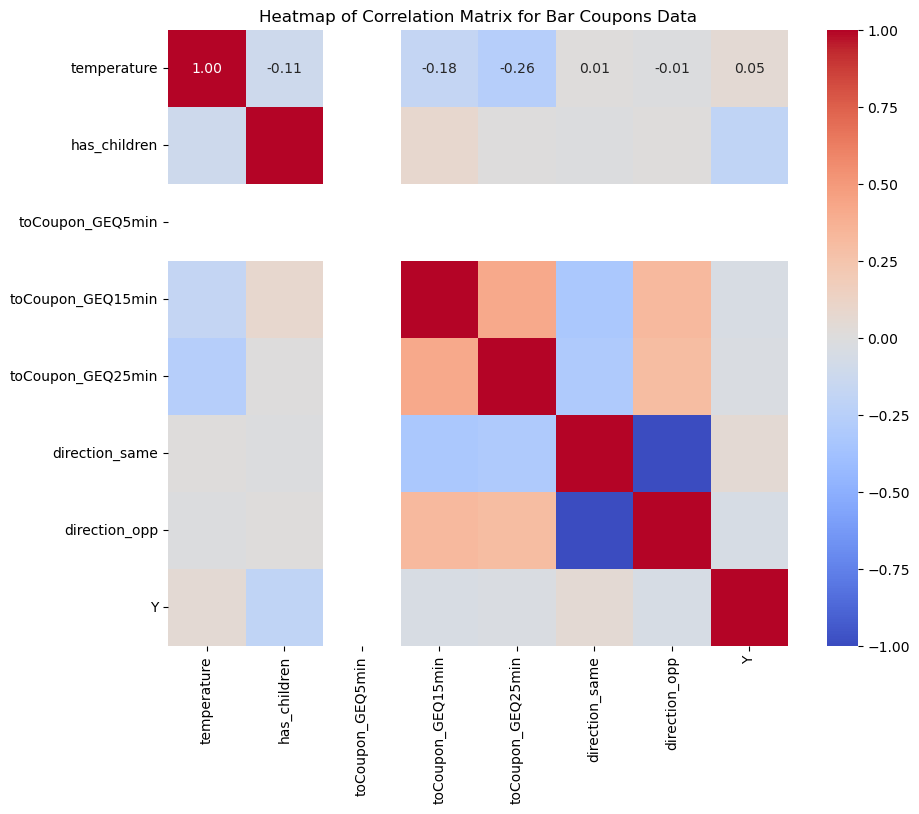

In [74]:
numeric_columns = bar_coupons_df.select_dtypes(include=['int64', 'float64']).columns
bar_coupons_numeric = bar_coupons_df[numeric_columns]
correlation_matrix = bar_coupons_numeric.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix for Bar Coupons Data')
plt.show()


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Number of coupons accepted per category

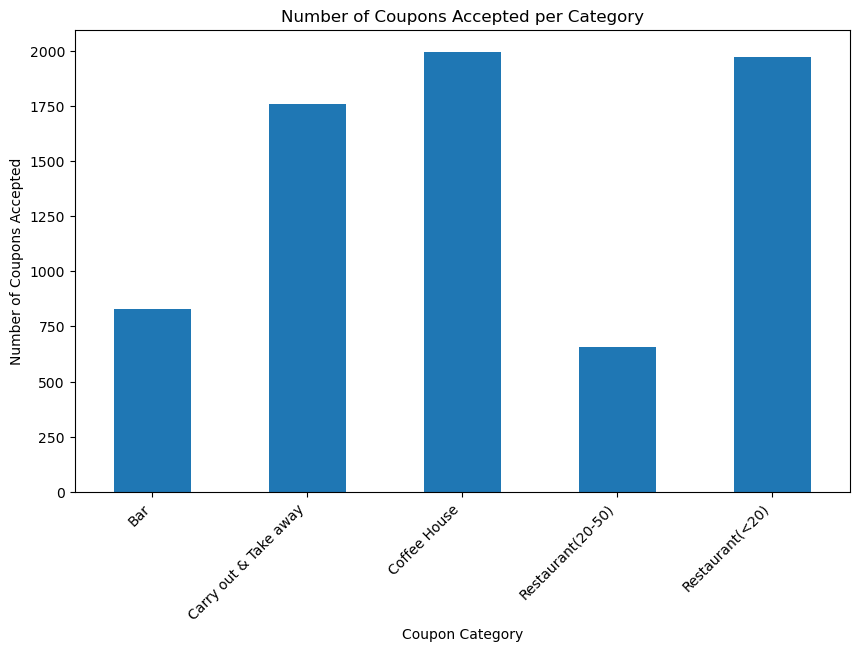

In [75]:
accepted_coupons = data[data['Y'] == 1]

coupons_per_category = accepted_coupons.groupby('coupon').size()

coupons_per_category.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Coupons Accepted per Category')
plt.xlabel('Coupon Category')
plt.ylabel('Number of Coupons Accepted')
plt.xticks(rotation=45, ha='right')
plt.show()

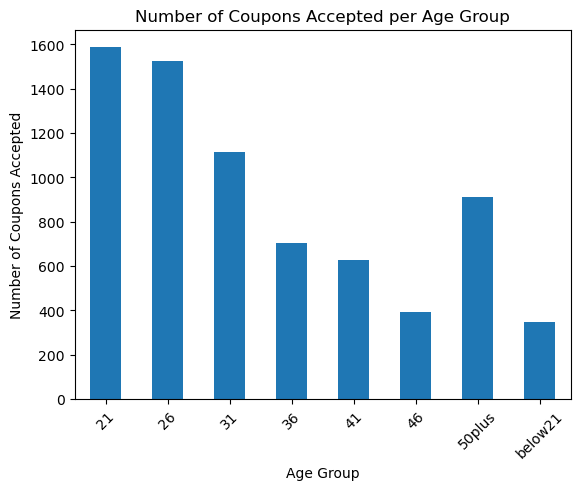

In [76]:
accepted_coupons = data[data['Y'] == 1]

coupons_per_age_group = accepted_coupons.groupby('age').size()

coupons_per_age_group.plot(kind='bar')
plt.title('Number of Coupons Accepted per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Coupons Accepted')
plt.xticks(rotation=45)
plt.show()

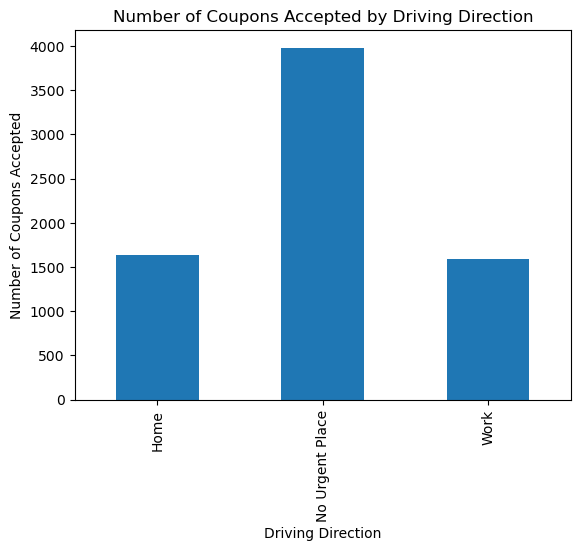

In [79]:
accepted_coupons = data[data['Y'] == 1]

coupons_per_direction = accepted_coupons.groupby('destination').size()

# Plot the bar plot
coupons_per_direction.plot(kind='bar')
plt.title('Number of Coupons Accepted by Driving Direction')
plt.xlabel('Driving Direction')
plt.ylabel('Number of Coupons Accepted')
plt.show()